# 📓 EDA — Movilidad CDMX (2021–2025)

## 🎯 Objetivo del Proyecto
Analizar la movilidad de la Ciudad de México a través de la afluencia registrada en los principales sistemas de transporte público —**Metro, Metrobús, Trolebús, Cablebús y Tren Ligero**— con datos abiertos actualizados a 2025.  

El proyecto busca identificar **patrones de uso**, **tendencias temporales** y **diferencias entre líneas y estaciones**, así como evaluar el **impacto de los distintos tipos de pago**.  

Los resultados se presentarán en un **dashboard interactivo en Power BI**, con una página dedicada a cada sistema de transporte y una visión general comparativa. Además, se implementará un **chatbot en Power BI** que permita responder preguntas de negocio de manera dinámica, facilitando la exploración de los datos y el apoyo a la toma de decisiones en materia de movilidad urbana.


## 🔎 EDA Parte 1 — Exploración inicial

En esta primera parte se realiza:
- Revisión de estructura con `.info()`.
- Estadísticas descriptivas con `.describe()`.
- Conteo de valores nulos y duplicados.
- Exploración de variables categóricas (`linea`, `estacion`, `tipo_pago`).
- Primeras visualizaciones:
  - Histograma de `afluencia`.
  - Registros por año y sistema.


In [ ]:
# === Paso 2: Configuración e importación de librerías ===

import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = Path("data")

# Verificamos que exista
assert DATA_DIR.exists(), f"No se encontró la carpeta {DATA_DIR}"
print("Ruta de datos:", DATA_DIR.resolve())


Ruta de datos: C:\Users\cammh\OneDrive\Escritorio\movilidad-cdmx-2021-2025\data


Se cargarán en un **diccionario de DataFrames** para poder explorarlos por separado

In [2]:
files = {
    "metro": "afluencia Metro.csv",
    "metrobus": "afluencia Metrobus.csv",
    "trolebus": "afluencia trolebus.csv",
    "cablebus": "afluencia cable bus.csv",
    "tren_ligero": "afluencia tren ligero.csv"
}

# Cargar todos en un diccionario de DataFrames
dfs = {}
for sistema, filename in files.items():
    path = DATA_DIR / filename
    dfs[sistema] = pd.read_csv(path)
    print(f"{sistema:10s} -> {dfs[sistema].shape[0]:,} filas x {dfs[sistema].shape[1]} columnas")

# Vista rápida del Metro
dfs["metro"].head()

metro      -> 978,705 filas x 7 columnas
metrobus   -> 23,422 filas x 8 columnas
trolebus   -> 44,901 filas x 8 columnas
cablebus   -> 5,232 filas x 8 columnas
tren_ligero -> 2,616 filas x 7 columnas


,fecha,mes,anio,linea,estacion,tipo_pago,afluencia
0,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Boleto,1848
1,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Prepago,790
2,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Gratuidad,325
3,2021-01-01,Enero,2021,LÃ­nea 1,Balderas,Boleto,1103
4,2021-01-01,Enero,2021,LÃ­nea 1,Balderas,Prepago,922


## Estructura y vista rápida
Usamos `.info()` para ver tipos de dato y `.head()` para una muestra inicial de cada sistema.


In [6]:
for sistema, df in dfs.items():
    print(f"\n=== {sistema.upper()} ===")
    print(df.info())
    display(df.head(3))


=== METRO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978705 entries, 0 to 978704
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   fecha      978705 non-null  object
 1   mes        978705 non-null  object
 2   anio       978705 non-null  int64 
 3   linea      978705 non-null  object
 4   estacion   978705 non-null  object
 5   tipo_pago  978705 non-null  object
 6   afluencia  978705 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 52.3+ MB
None


,fecha,mes,anio,linea,estacion,tipo_pago,afluencia
0,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Boleto,1848
1,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Prepago,790
2,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Gratuidad,325



=== METROBUS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23422 entries, 0 to 23421
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           23422 non-null  object 
 1   mes             23422 non-null  object 
 2   anio            23422 non-null  int64  
 3   linea           23422 non-null  object 
 4   tipo_pago       23422 non-null  object 
 5   afluencia       23422 non-null  float64
 6   temporal_fecha  23422 non-null  object 
 7   ..anio_fecha    23422 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB
None


,fecha,mes,anio,linea,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2021-01-01,Enero,2021,Línea 1,Prepago,39122.0,2021-01,2021
1,2021-01-01,Enero,2021,Línea 1,Gratuidad,3528.0,2021-01,2021
2,2021-01-01,Enero,2021,Línea 2,Prepago,23669.0,2021-01,2021



=== TROLEBUS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44901 entries, 0 to 44900
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           44901 non-null  object
 1   mes             44901 non-null  object
 2   anio            44901 non-null  int64 
 3   linea           44901 non-null  object
 4   tipo_pago       44901 non-null  object
 5   afluencia       44901 non-null  int64 
 6   temporal_fecha  44901 non-null  object
 7   ..anio_fecha    44901 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.7+ MB
None


,fecha,mes,anio,linea,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2022-01-01,Enero,2022,Línea 1,Boleto,16826,2022-01,2022
1,2022-01-01,Enero,2022,Línea 1,Prepago,5062,2022-01,2022
2,2022-01-01,Enero,2022,Línea 1,Gratuidad,9111,2022-01,2022



=== CABLEBUS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           5232 non-null   object
 1   mes             5232 non-null   object
 2   anio            5232 non-null   int64 
 3   linea           5232 non-null   object
 4   tipo_pago       5232 non-null   object
 5   afluencia       5232 non-null   int64 
 6   temporal_fecha  5232 non-null   object
 7   ..anio_fecha    5232 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 327.1+ KB
None


,fecha,mes,anio,linea,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2022-01-01,Enero,2022,Línea 1,Prepago,24975,2022-01,2022
1,2022-01-01,Enero,2022,Línea 1,Gratuidad,2175,2022-01,2022
2,2022-01-01,Enero,2022,Línea 2,Prepago,42050,2022-01,2022



=== TREN_LIGERO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           2616 non-null   object 
 1   mes             2616 non-null   object 
 2   anio            2616 non-null   int64  
 3   tipo_pago       2616 non-null   object 
 4   afluencia       2616 non-null   float64
 5   temporal_fecha  2616 non-null   object 
 6   ..anio_fecha    2616 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 143.2+ KB
None


,fecha,mes,anio,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2022-01-01,Enero,2022,Prepago,14251.0,2022-01,2022
1,2022-01-01,Enero,2022,Gratuidad,1806.0,2022-01,2022
2,2022-01-02,Enero,2022,Prepago,21875.0,2022-01,2022


## Valores nulos y duplicados
Conteo total de nulos por dataset y número de filas completamente duplicadas.

In [8]:
print("\n--- Valores nulos por dataset ---")
for sistema, df in dfs.items():
    total_nulos = df.isna().sum().sum()
    print(f"{sistema:10s} -> {total_nulos} nulos en total")

print("\n--- Registros duplicados por dataset ---")
for sistema, df in dfs.items():
    dups = df.duplicated().sum()
    print(f"{sistema:10s} -> {dups} duplicados")



--- Valores nulos por dataset ---
metro      -> 0 nulos en total
metrobus   -> 0 nulos en total
trolebus   -> 0 nulos en total
cablebus   -> 0 nulos en total
tren_ligero -> 0 nulos en total

--- Registros duplicados por dataset ---
metro      -> 0 duplicados
metrobus   -> 0 duplicados
trolebus   -> 0 duplicados
cablebus   -> 0 duplicados
tren_ligero -> 0 duplicados


## Variables categóricas
Revisamos cardinalidad de `linea`, `estacion` y categorías presentes en `tipo_pago`.


In [9]:
for sistema, df in dfs.items():
    print(f"\n{sistema.upper()} — Categorías")
    if "linea" in df.columns:
        print(" Líneas:", df["linea"].nunique())
        print(" Top 10 líneas:", df["linea"].value_counts().head(10).to_dict())
    if "estacion" in df.columns:
        print(" Estaciones:", df["estacion"].nunique())
        print(" Top 10 estaciones:", df["estacion"].value_counts().head(10).to_dict())
    if "tipo_pago" in df.columns:
        print(" Tipos de pago:", df["tipo_pago"].dropna().unique())



METRO — Categorías
 Líneas: 24
 Top 10 líneas: {'LÃ\xadnea 2': 63432, 'Linea 2': 57024, 'LÃ\xadnea B': 55503, 'LÃ\xadnea 3': 55503, 'LÃ\xadnea 12': 52860, 'LÃ\xadnea 1': 52860, 'LÃ\xadnea 8': 50217, 'Linea 3': 49896, 'Linea B': 49896, 'Linea 1': 47520}
 Estaciones: 168
 Top 10 estaciones: {'PantitlÃ¡n': 20076, 'Tacubaya': 15057, 'Chabacano': 15057, 'Balderas': 10038, 'Pino SuÃ¡rez': 10038, 'Salto del Agua': 10038, 'Atlalilco': 10038, 'Candelaria': 10038, 'Zapata': 10038, 'Ermita': 10038}
 Tipos de pago: ['Boleto' 'Prepago' 'Gratuidad']

METROBUS — Categorías
 Líneas: 14
 Top 10 líneas: {'Línea 1': 2616, 'Línea 2': 2616, 'Línea 3': 2616, 'Línea 4': 2616, 'Línea 5': 2616, 'Línea 6': 2616, 'Línea 7': 2616, 'linea 1': 730, 'linea 2': 730, 'linea 3': 730}
 Tipos de pago: ['Prepago' 'Gratuidad']

TROLEBUS — Categorías
 Líneas: 26
 Top 10 líneas: {'Línea 1': 3831, 'Línea 1 Nochebús': 3831, 'Línea 2': 3831, 'Línea 3': 3831, 'Línea 4': 3831, 'Línea 5': 3831, 'Línea 6': 3831, 'Línea 7': 3831, '

## Histogramas de afluencia por sistema
Visualizamos la distribución de `afluencia` para detectar sesgos, outliers y escalas distintas.

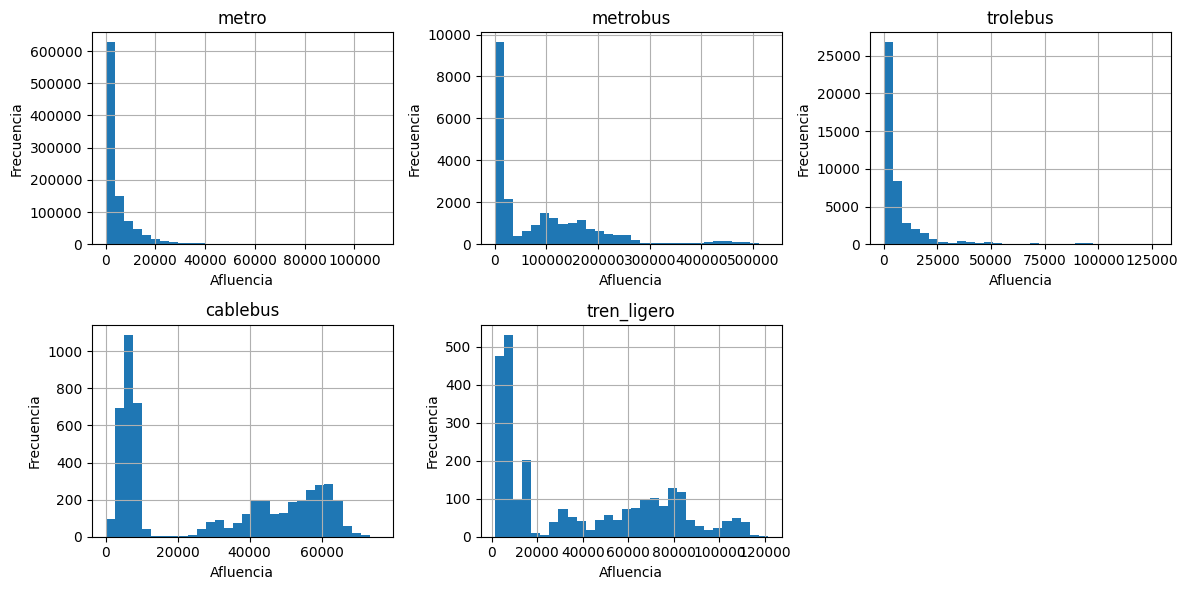

In [12]:
plt.figure(figsize=(12,6))
for i, (sistema, df) in enumerate(dfs.items(), 1):
    plt.subplot(2, 3, i)
    df["afluencia"].hist(bins=30)
    plt.title(sistema)
    plt.xlabel("Afluencia")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

## Registros por año y por sistema
Graficamos cuántos registros hay por año en cada sistema para confirmar coberturas temporales.


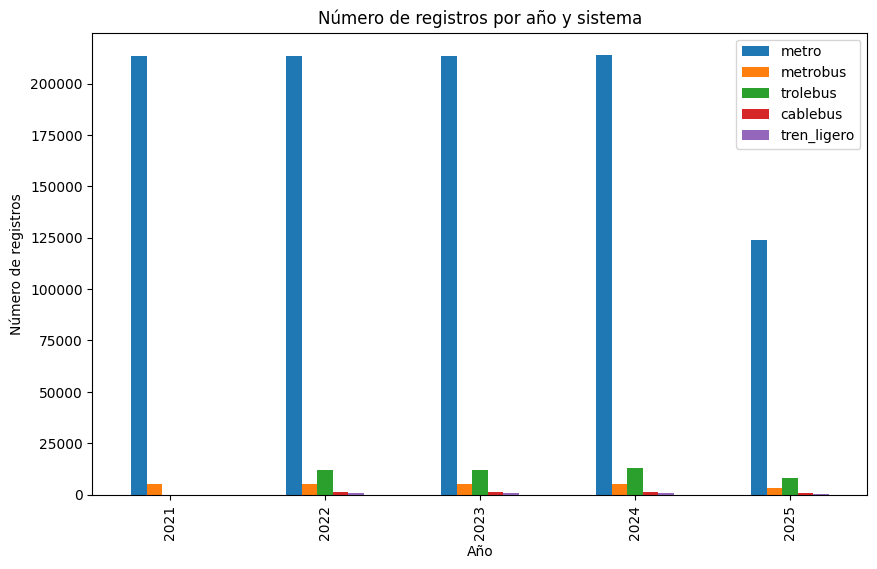

In [11]:
anios = {s: df["anio"].value_counts().sort_index() for s, df in dfs.items()}
anios_df = pd.DataFrame(anios).fillna(0).astype(int)

ax = anios_df.plot(kind="bar", figsize=(10,6))
ax.set_title("Número de registros por año y sistema")
ax.set_xlabel("Año")
ax.set_ylabel("Número de registros")
plt.show()


##  Observaciones — EDA Parte 1

1. **Estructura de datos**
   - Todos los datasets cargaron correctamente sin valores nulos ni duplicados.  
   - Algunos sistemas incluyen columnas adicionales (`temporal_fecha`, `_anio_fecha`) que después podremos estandarizar o descartar.  
   - Tipos de datos: `fecha` todavía está como `object` en todos los casos, será necesario convertirla a `datetime`.

2. **Cobertura temporal**
   - **Metro y Metrobús** tienen datos desde **2021 hasta 2025**.  
   - **Cablebús, Trolebús y Tren Ligero** comienzan en **2022**.  
   - Esto confirma diferencias de inicio de registros por sistema.

3. **Categorías**
   - **Metro** es el más detallado: 24 líneas y 168 estaciones.  
   - Los demás solo incluyen línea (Metrobús 6, Trolebús 6, Cablebús 2, Tren Ligero 1).  
   - En todos aparece la variable `tipo_pago`, con categorías **Prepago** y **Gratuidad**, además de **Boleto** en Metro/Trolebús.

4. **Distribución de afluencia**
   - En todos los sistemas la distribución es **altamente sesgada** hacia valores bajos, con algunos **outliers muy grandes** (ej. Metro y Metrobús).  
   - El Metro concentra la mayor cantidad de registros y usuarios, lo que se refleja en histogramas más cargados.

5. **Registros por año**
   - El Metro domina en volumen de registros.  
   - Cablebús, Trolebús y Tren Ligero tienen muy pocos registros en comparación, lo que puede impactar el análisis comparativo.  
   - La cobertura de años es consistente con lo esperado: Metro/Metrobús desde 2021 y el resto desde 2022.


## 🧹 EDA Parte 2 — Limpieza y estandarización

En esta parte se realiza:
- Normalización de nombres de columnas (minúsculas, sin acentos, guiones → `_`).  
- Conversión de tipos de datos:
  - `fecha` a formato datetime.  
  - `anio` y `mes` a valores numéricos.  
  - `afluencia` a numérico.  
- Adición de columna `sistema` para identificar cada dataset.  
- Unificación de todos los datasets en un único DataFrame `df_all`.  
- Resumen exploratorio consolidado por sistema.  

### Normalización de nombres de columnas
- Convertimos nombres a minúsculas.  
- Eliminamos acentos y reemplazamos espacios/guiones por `_`.  
- Renombramos sinónimos comunes (`año` → `anio`, `tipo_de_pago` → `tipo_pago`).  


In [13]:
import unicodedata

def normalize_colname(c):
    c = c.strip()
    # quitar acentos
    c = ''.join(ch for ch in unicodedata.normalize('NFKD', c) if not unicodedata.combining(ch))
    # minúsculas y reemplazos
    c = c.lower().replace(" ", "_").replace("-", "_")
    return c

def standardize_df(df, sistema):
    df = df.copy()
    # normalizar nombres
    df.columns = [normalize_colname(c) for c in df.columns]
    
    # renombrar sinónimos
    rename_map = {
        "año": "anio",
        "year": "anio",
        "tipopago": "tipo_pago",
        "tipo_de_pago": "tipo_pago",
        "afluencia_total": "afluencia",
        "linea_nombre": "linea"
    }
    df = df.rename(columns={c: rename_map.get(c, c) for c in df.columns})
    
    # agregar columna del sistema
    df["sistema"] = sistema
    return df

dfs_std = {k: standardize_df(v, k) for k, v in dfs.items()}
{k: df.columns.tolist() for k, df in dfs_std.items()}

{'metro': ['fecha',
  'mes',
  'anio',
  'linea',
  'estacion',
  'tipo_pago',
  'afluencia',
  'sistema'],
 'metrobus': ['fecha',
  'mes',
  'anio',
  'linea',
  'tipo_pago',
  'afluencia',
  'temporal_fecha',
  '..anio_fecha',
  'sistema'],
 'trolebus': ['fecha',
  'mes',
  'anio',
  'linea',
  'tipo_pago',
  'afluencia',
  'temporal_fecha',
  '..anio_fecha',
  'sistema'],
 'cablebus': ['fecha',
  'mes',
  'anio',
  'linea',
  'tipo_pago',
  'afluencia',
  'temporal_fecha',
  '..anio_fecha',
  'sistema'],
 'tren_ligero': ['fecha',
  'mes',
  'anio',
  'tipo_pago',
  'afluencia',
  'temporal_fecha',
  '..anio_fecha',
  'sistema']}

### Conversión de tipos de datos
- `fecha` → `datetime` (aceptando formatos con día/mes y corrigiendo errores).
- `anio` → numérico (si falta y hay `fecha`, lo inferimos).
- `mes` → número 1–12 (mapea nombres en español y limpia strings como “2021-01”).
- `afluencia` → numérico.
- Chequeo rápido de tipos y ejemplo de filas.


In [15]:
MESES_ES = {
    "enero":1, "febrero":2, "marzo":3, "abril":4, "mayo":5, "junio":6,
    "julio":7, "agosto":8, "septiembre":9, "setiembre":9, "octubre":10,
    "noviembre":11, "diciembre":12
}

def parse_mes(val):
    """
    Convierte distintos formatos de 'mes' a número:
    - 'Enero', 'enero' -> 1
    - '2021-01', '01-2021' -> 1
    - '1', 1 -> 1
    Si no puede parsearse, devuelve <NA>.
    """
    if val is None or (isinstance(val, float) and pd.isna(val)):
        return pd.NA
    s = str(val).strip().lower()


    num = pd.to_numeric(s, errors="coerce")
    if pd.notna(num):
        try:
            n = int(num)
            return n if 1 <= n <= 12 else pd.NA
        except Exception:
            pass


    s_clean = s.replace(".", " ").replace("_", " ").replace("-", " ").split()[0]
    if s_clean in MESES_ES:
        return MESES_ES[s_clean]

   
    tokens = [t for t in s.replace("_","-").replace(" ", "-").split("-") if t]
    if tokens:
        try:
            cand = int(tokens[-1])
            return cand if 1 <= cand <= 12 else pd.NA
        except Exception:
            pass

    return pd.NA

for k, df in dfs_std.items():
    df = df.copy()

  
    df["fecha"] = pd.to_datetime(
        df["fecha"], errors="coerce", dayfirst=True, infer_datetime_format=True
    )


    df["anio"] = pd.to_numeric(df.get("anio"), errors="coerce").astype("Int64")
    if df["anio"].isna().all() and df["fecha"].notna().any():
        df["anio"] = df["fecha"].dt.year.astype("Int64")

    
    df["mes"] = df["mes"].apply(parse_mes).astype("Int64")
    # si mes faltara, intentar desde fecha
    if df["mes"].isna().all() and df["fecha"].notna().any():
        df["mes"] = df["fecha"].dt.month.astype("Int64")


    df["afluencia"] = pd.to_numeric(df["afluencia"], errors="coerce")

    dfs_std[k] = df

cols_check = ["fecha","anio","mes","linea","estacion","tipo_pago","afluencia","sistema"]

for k, df in dfs_std.items():
    print(f"\n=== {k.upper()} ===")
    use_cols = [c for c in cols_check if c in df.columns]
    print(df[use_cols].dtypes)
    display(df[use_cols].head(3))


C:\Users\cammh\AppData\Local\Temp\ipykernel_24180\4110460693.py:48: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["fecha"] = pd.to_datetime(
C:\Users\cammh\AppData\Local\Temp\ipykernel_24180\4110460693.py:48: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["fecha"] = pd.to_datetime(
C:\Users\cammh\AppData\Local\Temp\ipykernel_24180\4110460693.py:48: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-dat


=== METRO ===
fecha        datetime64[ns]
anio                  Int64
mes                   Int64
linea                object
estacion             object
tipo_pago            object
afluencia             int64
sistema              object
dtype: object


C:\Users\cammh\AppData\Local\Temp\ipykernel_24180\4110460693.py:48: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["fecha"] = pd.to_datetime(
C:\Users\cammh\AppData\Local\Temp\ipykernel_24180\4110460693.py:48: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["fecha"] = pd.to_datetime(


,fecha,anio,mes,linea,estacion,tipo_pago,afluencia,sistema
0,2021-01-01,2021,1,LÃ­nea 1,Balbuena,Boleto,1848,metro
1,2021-01-01,2021,1,LÃ­nea 1,Balbuena,Prepago,790,metro
2,2021-01-01,2021,1,LÃ­nea 1,Balbuena,Gratuidad,325,metro



=== METROBUS ===
fecha        datetime64[ns]
anio                  Int64
mes                   Int64
linea                object
tipo_pago            object
afluencia           float64
sistema              object
dtype: object


,fecha,anio,mes,linea,tipo_pago,afluencia,sistema
0,2021-01-01,2021,1,Línea 1,Prepago,39122.0,metrobus
1,2021-01-01,2021,1,Línea 1,Gratuidad,3528.0,metrobus
2,2021-01-01,2021,1,Línea 2,Prepago,23669.0,metrobus



=== TROLEBUS ===
fecha        datetime64[ns]
anio                  Int64
mes                   Int64
linea                object
tipo_pago            object
afluencia             int64
sistema              object
dtype: object


,fecha,anio,mes,linea,tipo_pago,afluencia,sistema
0,2022-01-01,2022,1,Línea 1,Boleto,16826,trolebus
1,2022-01-01,2022,1,Línea 1,Prepago,5062,trolebus
2,2022-01-01,2022,1,Línea 1,Gratuidad,9111,trolebus



=== CABLEBUS ===
fecha        datetime64[ns]
anio                  Int64
mes                   Int64
linea                object
tipo_pago            object
afluencia             int64
sistema              object
dtype: object


,fecha,anio,mes,linea,tipo_pago,afluencia,sistema
0,2022-01-01,2022,1,Línea 1,Prepago,24975,cablebus
1,2022-01-01,2022,1,Línea 1,Gratuidad,2175,cablebus
2,2022-01-01,2022,1,Línea 2,Prepago,42050,cablebus



=== TREN_LIGERO ===
fecha        datetime64[ns]
anio                  Int64
mes                   Int64
tipo_pago            object
afluencia           float64
sistema              object
dtype: object


,fecha,anio,mes,tipo_pago,afluencia,sistema
0,2022-01-01,2022,1,Prepago,14251.0,tren_ligero
1,2022-01-01,2022,1,Gratuidad,1806.0,tren_ligero
2,2022-02-01,2022,1,Prepago,21875.0,tren_ligero


### Limpieza de valores en columna `linea`
- Corrección de caracteres raros por encoding. 
- Unificación del prefijo para que todas queden en formato `Linea X`.  

In [16]:
import re

def clean_linea(val):
    if pd.isna(val):
        return val
    s = str(val).strip()
    # reparar errores de encoding comunes
    s = s.replace("LÃ\xadnea", "Linea").replace("Línea", "Linea")
    s = s.replace("línea", "Linea").replace("linea", "Linea")
    # quitar espacios dobles
    s = re.sub(r"\s+", " ", s)
    return s

for k, df in dfs_std.items():
    if "linea" in df.columns:
        df["linea"] = df["linea"].apply(clean_linea)
        dfs_std[k] = df

# Revisión rápida de ejemplos
for k, df in dfs_std.items():
    if "linea" in df.columns:
        print(f"\n{k.upper()} - ejemplos de linea:")
        print(df["linea"].dropna().unique()[:10])


METRO - ejemplos de linea:
['Linea 1' 'Linea 12' 'Linea 2' 'Linea 3' 'Linea 4' 'Linea 5' 'Linea 6'
 'Linea 7' 'Linea 8' 'Linea 9']

METROBUS - ejemplos de linea:
['Linea 1' 'Linea 2' 'Linea 3' 'Linea 4' 'Linea 5' 'Linea 6' 'Linea 7']

TROLEBUS - ejemplos de linea:
['Linea 1' 'Linea 1 Nochebús' 'Linea 2' 'Linea 3' 'Linea 4' 'Linea 5'
 'Linea 6' 'Linea 7' 'Linea 8' 'Linea 9']

CABLEBUS - ejemplos de linea:
['Linea 1' 'Linea 2']


### Unificación de datasets
Creamos el DataFrame `df_all` con columnas estándar:
`sistema, fecha, anio, mes, linea, estacion, tipo_pago, afluencia` y una clave temporal `anio_mes`.


In [17]:
base_cols = ["sistema","fecha","anio","mes","linea","estacion","tipo_pago","afluencia"]

dfs_clean = []
for k, df in dfs_std.items():
    df = df.copy()
    for col in base_cols:
        if col not in df.columns:
            df[col] = pd.NA
    dfs_clean.append(df[base_cols])

df_all = pd.concat(dfs_clean, ignore_index=True)

df_all["anio_mes"] = df_all.apply(
    lambda r: f"{int(r['anio']):04d}-{int(r['mes']):02d}" 
              if pd.notna(r["anio"]) and pd.notna(r["mes"]) else pd.NA,
    axis=1
)

print("df_all shape:", df_all.shape)
display(df_all.head())


df_all shape: (1054876, 9)


,sistema,fecha,anio,mes,linea,estacion,tipo_pago,afluencia,anio_mes
0,metro,2021-01-01,2021,1,Linea 1,Balbuena,Boleto,1848.0,2021-01
1,metro,2021-01-01,2021,1,Linea 1,Balbuena,Prepago,790.0,2021-01
2,metro,2021-01-01,2021,1,Linea 1,Balbuena,Gratuidad,325.0,2021-01
3,metro,2021-01-01,2021,1,Linea 1,Balderas,Boleto,1103.0,2021-01
4,metro,2021-01-01,2021,1,Linea 1,Balderas,Prepago,922.0,2021-01


### Unificación completa de nombres de estaciones (Metro)
- Normalizamos texto (espacios, mayúsculas/minúsculas, caracteres raros).
- Usamos un diccionario maestro de correcciones (clave sin acentos → nombre correcto con acentos).
- Reportamos un mapeo **antes → después** para auditoría.
- Regeneramos el Top 10 de estaciones ya unificadas.


In [47]:
import re, unicodedata, difflib
import pandas as pd

# 1) Lista oficial SIN ACENTOS (exactamente como la quieres en el data)
OFFICIAL_STATIONS_TEXT = """
acatitla
aculco
agricola oriental
allende
apatlaco
aquiles serdan
aragon
atlalilco
auditorio
autobuses del norte
azcapotzalco
balbuena
balderas
barranca del muerto
bellas artes
bondojito
bosque de aragon
boulevard puerto aereo
buenavista
calle 11
camarones
canal de san juan
canal del norte
candelaria
centro medico
cerro de la estrella
chabacano
chapultepec
chilpancingo
ciudad azteca
ciudad deportiva
colegio militar
constitucion de 1917
consulado
copilco
coyoacan
coyuya
cuatro caminos
cuauhtemoc
cuitlahuac
culhuacan
deportivo 18 de marzo
deportivo oceania
division del norte
doctores
el rosario
ermita
escuadron 201
etiopia / plaza de la transparencia
eugenia
ferreria / arena ciudad de mexico
fray servando
garibaldi / lagunilla
general anaya
gomez farias
guelatao
guerrero
hangares
hidalgo
hospital 20 de noviembre
hospital general
impulsora
indios verdes
instituto del petroleo
insurgentes
insurgentes sur
isabel la catolica
iztacalco
iztapalapa
jamaica
juanacatlan
juarez
la paz
la raza
la viga
la villa-basilica
lazaro cardenas
lindavista
lomas estrella
los reyes
martin carrera
merced
mexicaltzingo
misterios
mixcoac
mixiuhca
moctezuma
morelos
nativitas
nezahualcoyotl
ninos heroes
nopalera
normal
norte 45
obrera
observatorio
oceania
olivos
pantitlan
parque de los venados
patriotismo
penon viejo
periferico oriente
pino suarez
polanco
politecnico
popotla
portales
potrero
puebla
refineria
revolucion
ricardo flores magon
rio de los remedios
romero rubio
salto del agua
san andres tomatlan
san antonio
san antonio abad
san cosme
san joaquin
san juan de letran
san lazaro
san pedro de los pinos
santa anita
santa marta
sevilla
tacuba
tacubaya
talisman
tasquena
tepalcates
tepito
terminal aerea
tezonco
tezozomoc
tlahuac
tlaltenco
tlatelolco
universidad
uam-i
valle gomez
vallejo
velodromo
viaducto
villa de aragon
villa de cortes
viveros / derechos humanos
xola
zapata
zapotitlan
zaragoza
# extras vistas en tus pendientes para asegurar match
eje central
panteones
zocalo/tenochtitlan
miguel angel de quevedo
eduardo molina
constituyentes
ecatepec
lagunilla
plaza aragon
olimpica
muzquiz
"""

MANUAL_FIXES = {
    "gaomez faraas": "gomez farias",
    "tasqueaa": "tasquena",
    "san andras tomatlan": "san andres tomatlan",
    "san andres tomatlan ": "san andres tomatlan",
    "zocalo / tenochtitlan": "zocalo/tenochtitlan",
    "olampica": "olimpica",
    "olampika": "olimpica",
    "maozquiz": "muzquiz",  
}

def strip_accents_lower(s: str) -> str:
    s = str(s).lower().strip()
    s = s.replace("Ã", "a").replace("Â", "")  
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"\s+", " ", s)
    return s

def token_sort(s: str) -> str:
    toks = [t for t in re.split(r"[\s/]", s) if t]
    toks.sort()
    return " ".join(toks)

official_list = [strip_accents_lower(x) for x in OFFICIAL_STATIONS_TEXT.splitlines()
                 if x.strip() and not x.strip().startswith("#")]
official_set  = set(official_list)
official_token_index = {token_sort(x): x for x in official_list}

mask_metro = df_all["sistema"].eq("metro")
raw = df_all.loc[mask_metro, "estacion"].dropna().astype(str)

def best_match_official(name: str, cutoff=0.80) -> str | None:
    s = strip_accents_lower(name)
    # mapeo manual primero
    if s in MANUAL_FIXES:
        return MANUAL_FIXES[s]
    # match exacto
    if s in official_set:
        return s
    # token-sort exacto
    ts = token_sort(s)
    if ts in official_token_index:
        return official_token_index[ts]
    candidates = difflib.get_close_matches(ts, list(official_token_index.keys()), n=1, cutoff=cutoff)
    if candidates:
        return official_token_index[candidates[0]]
    return None

mapped = raw.map(best_match_official)
mapped = mapped.fillna(raw.map(strip_accents_lower))

# aplicar al dataframe
df_all.loc[mask_metro, "estacion"] = mapped
pending = (
    pd.DataFrame({"antes": raw, "despues": df_all.loc[mask_metro, "estacion"]})
    .drop_duplicates()
)
pendientes = pending[~pending["despues"].isin(official_set)]
display(pendientes.head(30))
print("Pendientes totales:", len(pendientes))

,antes,despues


Pendientes totales: 0


### Resumen exploratorio consolidado
Validamos volumen por sistema, rango de fechas, nº de líneas/estaciones y afluencia total.

In [48]:
resumen = (
    df_all.groupby("sistema")
    .agg(
        filas=("sistema","size"),
        fecha_min=("fecha","min"),
        fecha_max=("fecha","max"),
        n_lineas=("linea", lambda s: s.dropna().nunique()),
        n_estaciones=("estacion", lambda s: s.dropna().nunique()),
        afluencia_total=("afluencia","sum")
    )
    .sort_index()
)
resumen

,filas,fecha_min,fecha_max,n_lineas,n_estaciones,afluencia_total
sistema,,,,,,
cablebus,5232,2022-01-01,2025-12-07,2,0,1.481264e+08
metro,978705,2021-01-01,2025-12-07,12,163,4.812475e+09
metrobus,23422,2021-01-01,2025-12-07,7,0,2.074183e+09
tren_ligero,2616,2022-01-01,2025-12-07,0,0,9.882305e+07
trolebus,44901,2022-01-01,2025-12-07,26,0,3.204738e+08


## 📌 Observaciones — EDA Parte 2  

### 1. Normalización de columnas  
- Se estandarizaron nombres a **minúsculas**, sin acentos y con guiones bajos (`_`).  
- Se unificaron sinónimos: `año` → `anio`, `tipo_de_pago` → `tipo_pago`, etc.  
- Se agregó una columna `sistema` para identificar el origen de cada registro.  

### 2. Conversión de tipos de datos  
- `fecha` convertida a **datetime64**, lista para análisis temporal.  
- `anio` y `mes` convertidos a valores numéricos consistentes.  
- `afluencia` convertida a **numérico (int/float)** para cálculos estadísticos.  

### 3. Limpieza en columna `linea`  
- Corrección de errores de encoding detectados (ej. “LÃ­nea”).  
- Estandarización del formato → todas quedan como **"Linea X"**.  

### 4. Limpieza en columna `estacion`  
- Se corrigieron errores de codificación y variantes de escritura.  
- Se unificaron los nombres según el catálogo oficial del **Metro CDMX**  
- Ahora todas las estaciones aparecen con el mismo formato, sin acentos pero correctamente escritas.  

### 5. Unificación de datasets  
- Se consolidaron todos los sistemas en un único DataFrame con **9 columnas estandarizadas**.  
- Se creó la clave temporal `anio_mes` para facilitar análisis mensual.  

### 6. Resumen exploratorio consolidado  
- **Cobertura temporal:** Metro y Metrobús desde 2021; Trolebús, Cablebús y Tren Ligero desde 2022.  
- **Volumen de registros:** Metro domina con más de **978 mil filas**, seguido de Trolebús (44 mil) y Metrobús (23 mil).  
- **Afluencia total:** Metro concentra la mayoría de los viajes (~4.8 mil millones), seguido de Trolebús (~320 millones).  
- **Cablebús y Tren Ligero** presentan volúmenes menores pero relevantes a partir de 2022.  

# 🔍 EDA Parte 3 — Análisis exploratorio avanzado

En esta tercera parte se profundiza en el análisis de los datos ya unificados y estandarizados :

1. **Tendencias temporales**
   - Evolución mensual de la afluencia por sistema.
   - Comparación entre sistemas en el mismo periodo.

2. **Análisis por líneas y estaciones**
   - Identificación de las 10 líneas con mayor afluencia total.
   - Identificación de las 10 estaciones con mayor afluencia total.

3. **Distribución y outliers**
   - Visualización de distribuciones de afluencia mediante histogramas y boxplots.
   - Detección de posibles valores atípicos o registros extremos.

4. **Correlaciones básicas**
   - Cálculo de correlaciones entre variables numéricas (`anio`, `mes`, `afluencia`).
   - Representación con matriz de calor.

## Tendencias temporales de afluencia

Analizamos la evolución de la afluencia total mes a mes, desagregada por sistema. Esto nos permitirá observar patrones generales, identificar periodos de crecimiento o caída,  
y comparar entre los distintos sistemas de transporte.


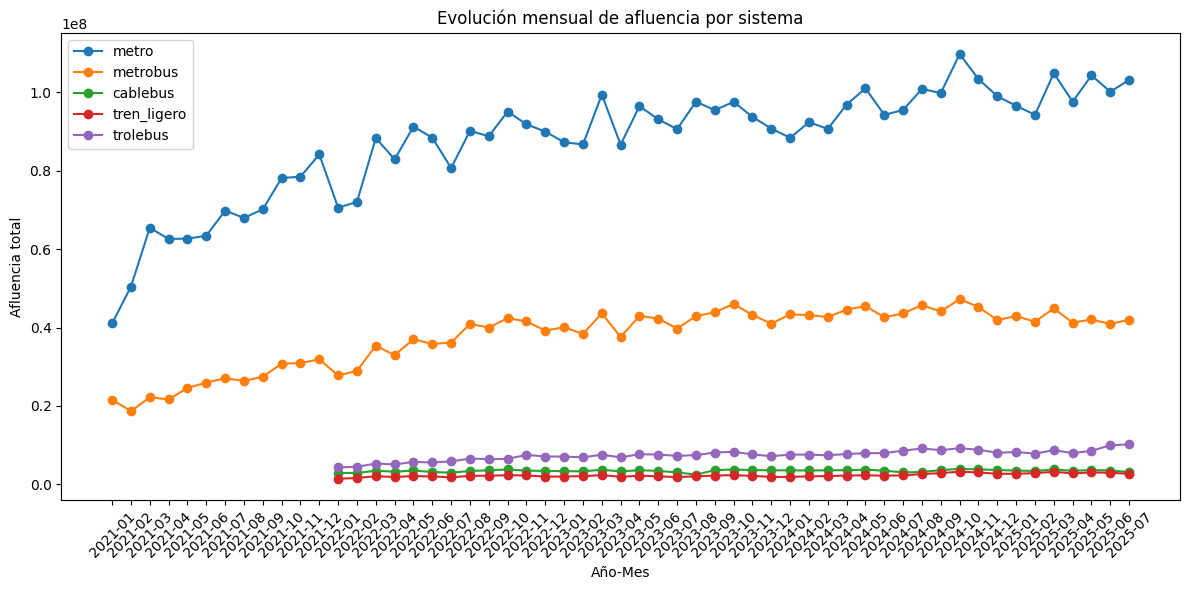

In [28]:
afluencia_mensual = (
    df_all.groupby(["anio_mes", "sistema"])["afluencia"]
    .sum()
    .reset_index()
    .sort_values("anio_mes")
)

# Gráfico de líneas por sistema
plt.figure(figsize=(12,6))
for sistema in afluencia_mensual["sistema"].unique():
    data = afluencia_mensual[afluencia_mensual["sistema"] == sistema]
    plt.plot(data["anio_mes"], data["afluencia"], marker="o", label=sistema)

plt.title("Evolución mensual de afluencia por sistema")
plt.xlabel("Año-Mes")
plt.ylabel("Afluencia total")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Participación relativa de afluencia por sistema

Visualizamos la proporción de cada sistema en la afluencia total de manera acumulada. Esto ayuda a identificar qué tan dominante es el Metro frente a otros sistemas, y si  
alguno de los transportes más pequeños ha ganado participación en el tiempo.


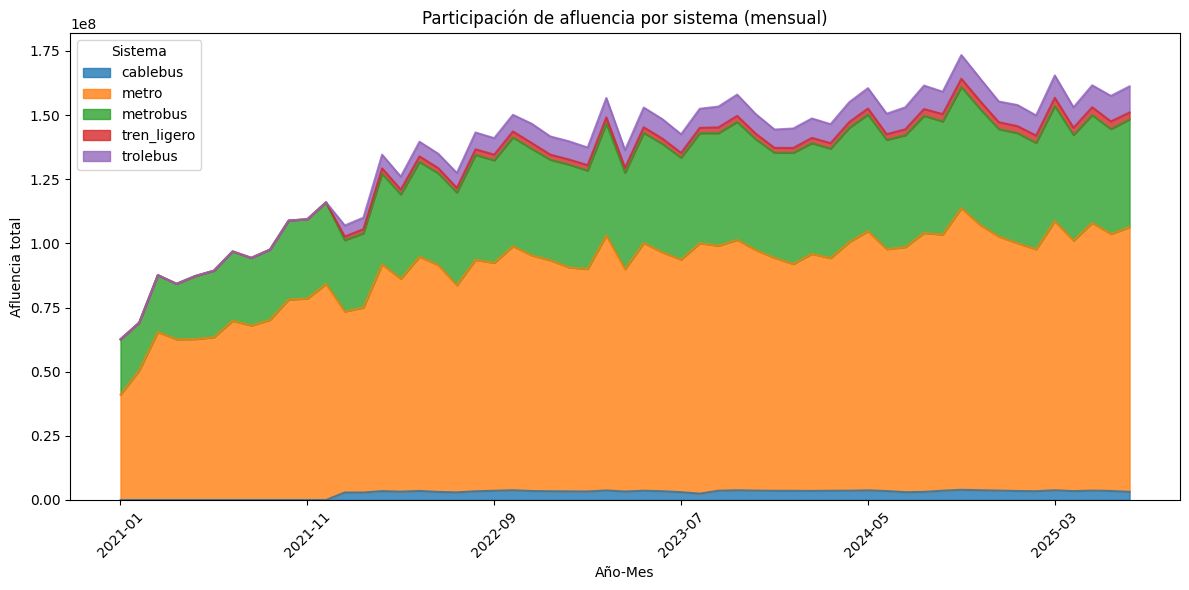

In [50]:
afluencia_area = (
    afluencia_mensual.pivot(index="anio_mes", columns="sistema", values="afluencia")
    .fillna(0)
)


afluencia_area.plot.area(figsize=(12,6), alpha=0.8)

plt.title("Participación de afluencia por sistema (mensual)")
plt.xlabel("Año-Mes")
plt.ylabel("Afluencia total")
plt.xticks(rotation=45)
plt.legend(title="Sistema")
plt.tight_layout()
plt.show()


## Análisis estacional (afluencia promedio por mes del año)

Para identificar patrones estacionales:
- Se calcula la afluencia promedio por mes (1–12) para cada sistema.
- Se visualiza en un gráfico de líneas.
Esto permite detectar meses con mayor demanda y posibles efectos estacionales
como vacaciones, fin de año o inicio de clases.

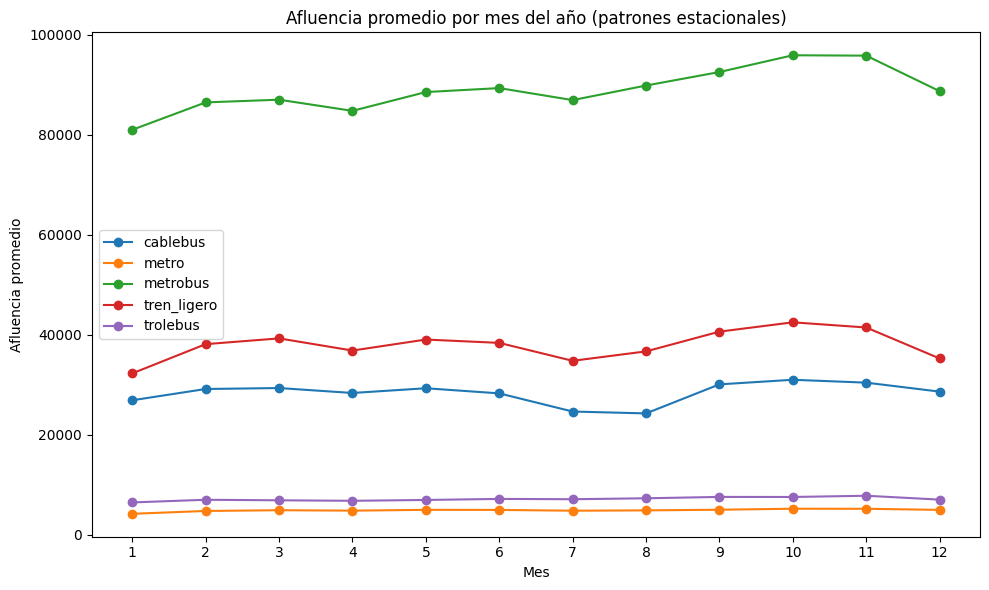

In [30]:
afluencia_estacional = (
    df_all.groupby(["mes", "sistema"])["afluencia"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
for sistema in afluencia_estacional["sistema"].unique():
    data = afluencia_estacional[afluencia_estacional["sistema"] == sistema]
    plt.plot(data["mes"], data["afluencia"], marker="o", label=sistema)

plt.title("Afluencia promedio por mes del año (patrones estacionales)")
plt.xlabel("Mes")
plt.ylabel("Afluencia promedio")
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

## Top 10 líneas con mayor afluencia total

Calculamos la suma de afluencia por línea y mostramos las 10 con mayor volumen acumulado en el periodo 2021–2025. Esto nos permitirá identificar las líneas más importantes en términos de movilidad.

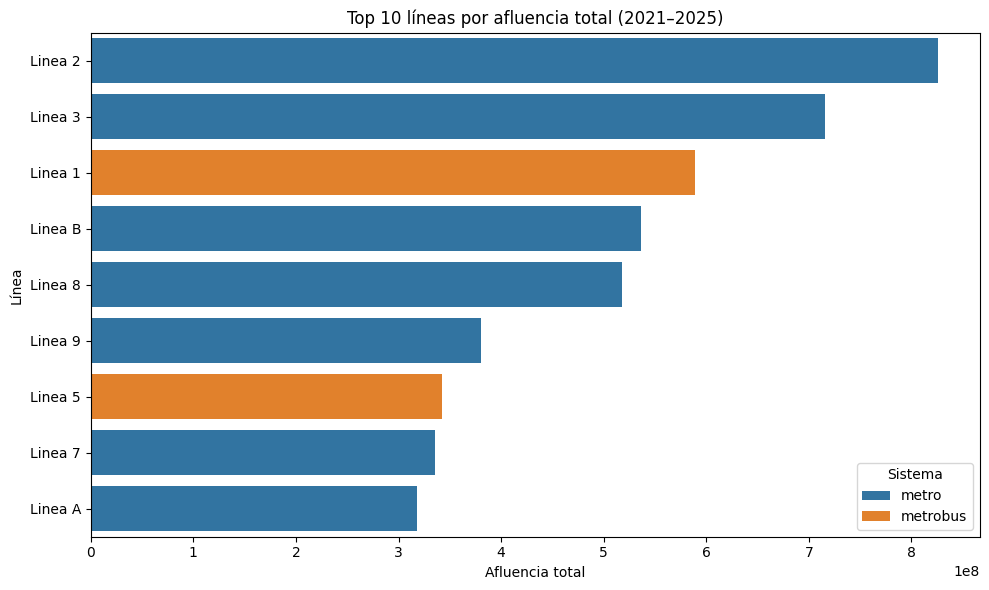

In [31]:
top_lineas = (
    df_all.groupby(["sistema", "linea"])["afluencia"]
    .sum()
    .reset_index()
    .sort_values("afluencia", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_lineas, x="afluencia", y="linea", hue="sistema", dodge=False)
plt.title("Top 10 líneas por afluencia total (2021–2025)")
plt.xlabel("Afluencia total")
plt.ylabel("Línea")
plt.legend(title="Sistema")
plt.tight_layout()
plt.show()

## Top 10 estaciones del Metro con mayor afluencia total

El Metro es el único sistema con detalle a nivel de estación. Aquí mostramos las 10 estaciones más utilizadas entre 2021–2025, lo que permite identificar los nodos clave de la red.


C:\Users\cammh\AppData\Local\Temp\ipykernel_24180\706389970.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_estaciones, x="afluencia", y="estacion", palette="Blues_r")


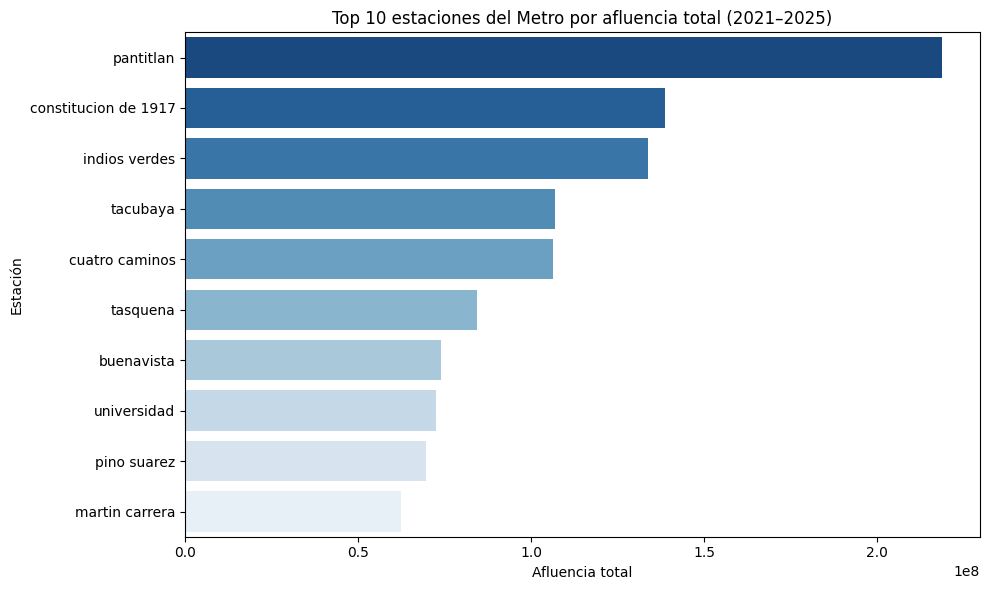

In [49]:
top_estaciones = (
    df_all[df_all["sistema"] == "metro"]
    .groupby("estacion")["afluencia"]
    .sum()
    .reset_index()
    .sort_values("afluencia", ascending=False)
    .head(10)
)


plt.figure(figsize=(10,6))
sns.barplot(data=top_estaciones, x="afluencia", y="estacion", palette="Blues_r")
plt.title("Top 10 estaciones del Metro por afluencia total (2021–2025)")
plt.xlabel("Afluencia total")
plt.ylabel("Estación")
plt.tight_layout()
plt.show()

### Distribución de la afluencia (todas las observaciones)

El histograma muestra la **distribución global de la variable `afluencia`** en todos los sistemas y periodos.  
- La mayor parte de las observaciones se concentran en valores bajos
- Existe una **cola larga hacia la derecha**, lo que indica que algunos registros alcanzan afluencias muy altas.  
- Esta asimetría sugiere la presencia de **outliers** o casos extremos que podrían corresponder a estaciones/meses con una demanda excepcional.

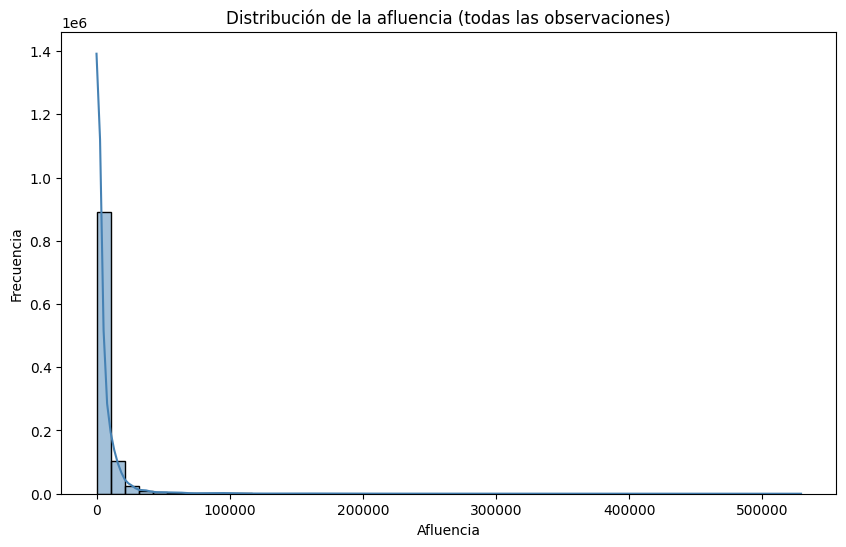

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(df_all["afluencia"], bins=50, kde=True, color="steelblue")
plt.title("Distribución de la afluencia (todas las observaciones)")
plt.xlabel("Afluencia")
plt.ylabel("Frecuencia")
plt.show()


### Distribución de la afluencia por sistema (detección de outliers)

El boxplot compara la distribución de `afluencia` entre los diferentes sistemas de transporte:  
- El **Metro** muestra valores medianos más bajos, ya que sus registros están desagregados por **estación**.  
- En contraste, sistemas como **Metrobús, Trolebús, Cablebús y Tren Ligero** concentran valores más altos porque cada fila representa la afluencia de toda una **línea**.  
- En todos los casos aparecen outliers, lo cual confirma la existencia de registros con afluencias extraordinarias.  
- Esta visualización ayuda a identificar la dispersión interna de cada sistema y la necesidad de normalizar o agregar datos para comparaciones más justas.

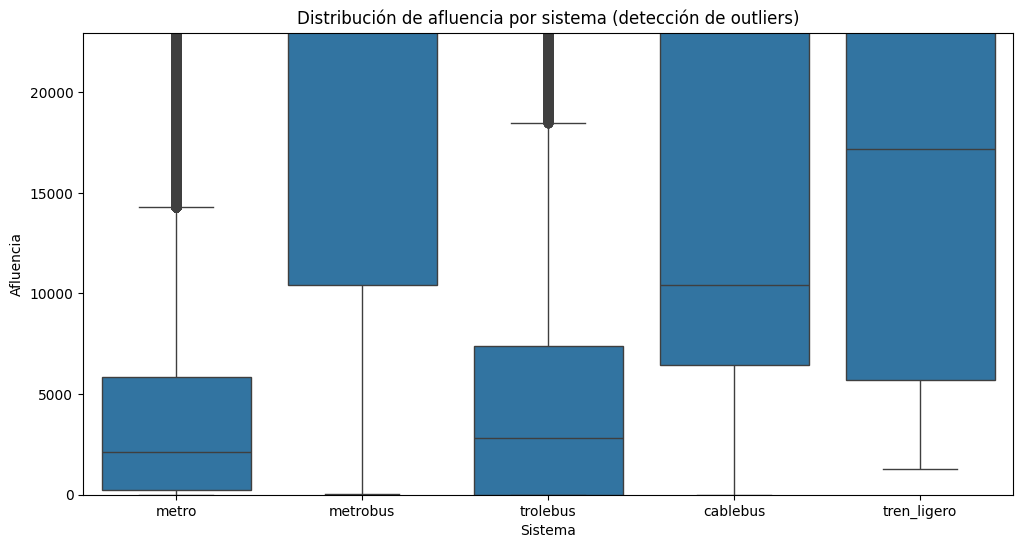

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_all, x="sistema", y="afluencia")
plt.title("Distribución de afluencia por sistema (detección de outliers)")
plt.xlabel("Sistema")
plt.ylabel("Afluencia")
plt.ylim(0, df_all["afluencia"].quantile(0.95))  # recorte para visualizar mejor
plt.show()

### Matriz de correlación global
- La correlación entre **año** y **afluencia** es muy baja (0.05), lo que indica que la tendencia de aumento o disminución no se explica únicamente por el paso del tiempo.
- La variable **mes** no presenta relación significativa ni con el año ni con la afluencia, lo que sugiere que los patrones estacionales son poco marcados de forma global.
- En general, las correlaciones son débiles, lo que apunta a que la variabilidad de la afluencia depende de factores adicionales no capturados en estas variables

### Correlaciones por sistema
- **Metro** y **Metrobús**: muestran una correlación positiva moderada-alta entre año y afluencia. Esto sugiere un crecimiento sostenido en la demanda de estos sistemas con el tiempo.
- **Trolebús**: también presenta una correlación alta, reflejando un aumento de relevancia en los últimos años.
- **Tren Ligero**: la correlación es positiva pero ligeramente menor, aún consistente con un crecimiento estable.
- **Cablebús**: muestra correlaciones bajas, lo cual puede explicarse porque es un sistema nuevo y sus registros son más recientes, con menos variabilidad.

 **Conclusión general**: los sistemas con más años de operación (Metro, Metrobús, Trolebús) muestran un crecimiento consistente en afluencia con el tiempo, mientras que Cablebús todavía no refleja una tendencia tan clara por ser relativamente nuevo. Las variables de mes no capturan estacionalidad fuerte.

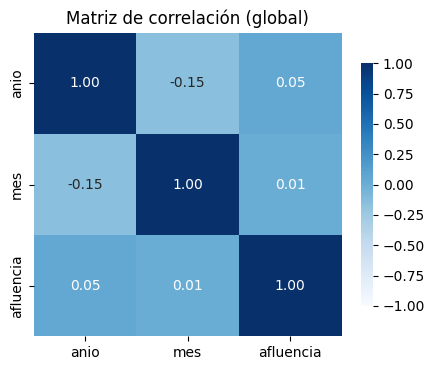

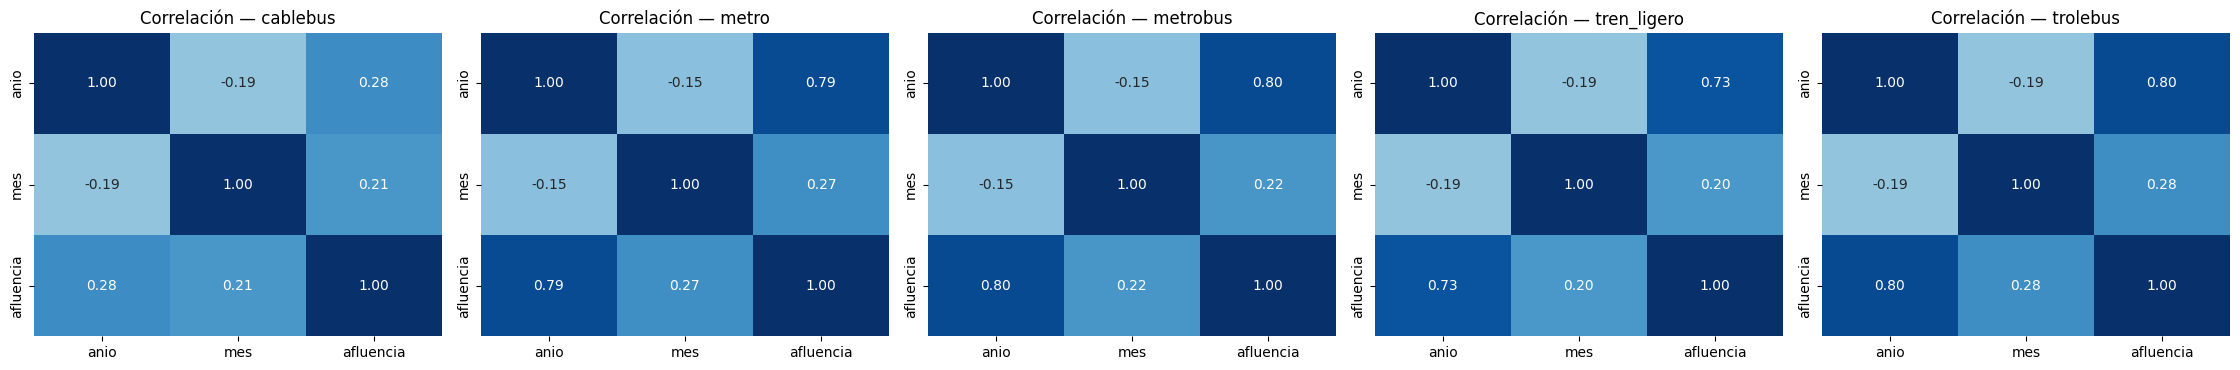

In [53]:
num_cols = ["anio", "mes", "afluencia"]
df_num = df_all[num_cols].copy().dropna()

corr_global = df_num.corr(method="pearson")
plt.figure(figsize=(4.5, 3.8))
sns.heatmap(corr_global, annot=True, cmap="Blues", vmin=-1, vmax=1, fmt=".2f",
            cbar_kws={"shrink": .8})
plt.title("Matriz de correlación (global)")
plt.tight_layout()
plt.show()

df_mensual = (
    df_all
    .groupby(["sistema", "anio", "mes"], as_index=False)["afluencia"]
    .sum()
    .dropna()
)

sistemas = df_mensual["sistema"].unique().tolist()

n = len(sistemas)
fig, axes = plt.subplots(1, n, figsize=(4.5*n, 3.8), squeeze=False)

for i, sis in enumerate(sistemas):
    temp = df_mensual.loc[df_mensual["sistema"] == sis, ["anio", "mes", "afluencia"]]

    if temp[var].nunique().min() <= 1 if (var := ["anio","mes","afluencia"]) else False:
        corr = temp.corr(method="pearson")  
    else:
        corr = temp.corr(method="pearson")

    sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1, fmt=".2f",
                cbar=False, ax=axes[0, i])
    axes[0, i].set_title(f"Correlación — {sis}")

plt.tight_layout()
plt.show()

## 📊 Observaciones — EDA Parte 3

### 1. Tendencias temporales
- El **Metro** concentra la mayor parte de la afluencia mensual, superando consistentemente los **80–100 millones de viajes**.
- El **Metrobús** mantiene un volumen estable de **30–45 millones** mensuales, consolidándose como el segundo sistema más importante.
- **Trolebús**, **Cablebús** y **Tren Ligero** muestran volúmenes menores, aunque con una tendencia de crecimiento gradual desde 2022.
- En la participación acumulada, Metro y Metrobús dominan el total, mientras que Cablebús apenas comienza a tener presencia.

### 2. Análisis por líneas y estaciones
- **Top 10 líneas**: predominan las del Metro (líneas 2, 3, 1 y 8) con los mayores volúmenes de afluencia, superando incluso a las principales del Metrobús.
- **Top 10 estaciones del Metro**: destacan **Pantitlan**, **Constitucion de 1917**, **Indios Verdes** y **Tacubaya**, que concentran gran parte de los viajes.  
  Estas estaciones funcionan como **nodos estratégicos** de transferencia en la red.

### 3. Distribución y outliers
- La variable **afluencia** presenta una distribución sesgada a la derecha: la mayoría de los registros son de baja afluencia, con pocos valores muy altos.
- Se detectaron **outliers** en todos los sistemas, reflejando estaciones o periodos con afluencias atípicas (picos de demanda o errores de captura).
- Metro muestra la mayor variabilidad en registros extremos, consistente con su magnitud y heterogeneidad de estaciones.

### 4. Correlaciones básicas
- A nivel global, las correlaciones entre **anio, mes y afluencia** son bajas, lo que indica que la afluencia no se explica únicamente por factores temporales simples.
- Al analizar por sistema:
  - **Metro, Metrobús y Trolebús** muestran **correlaciones positivas moderadas-altas** entre año y afluencia (0.73–0.80), reflejando un crecimiento sostenido.
  - **Tren Ligero** también muestra una correlación positiva, aunque ligeramente más baja (0.73).
  - **Cablebús** tiene correlaciones débiles, lo cual es esperable dado que es un sistema reciente con registros limitados.
- Los valores de **mes** no presentan correlaciones significativas, por lo que no se observan patrones estacionales claros de forma general.

---

📌 **Conclusión del EDA 3**:  
El análisis avanzado confirma que **Metro y Metrobús concentran la mayor parte de la movilidad en CDMX**, con estaciones y líneas críticas que sostienen gran parte de la demanda.  
Los **sistemas más nuevos** (Cablebús y en menor medida Tren Ligero) aún muestran menor impacto, aunque con señales de crecimiento.  
La distribución de afluencias refleja la heterogeneidad de la red y la necesidad de analizar **outliers** en detalle, mientras que las correlaciones sugieren que otros factores externos (infraestructura, políticas públicas, eventos sociales) influyen más que la simple temporalidad.


In [54]:
# === Exportar dataset final limpio ===

output_path = "movilidad_cdmx_2021_2025.csv"
df_all.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ Archivo exportado como: {output_path}")
print("Shape final:", df_all.shape)


✅ Archivo exportado como: movilidad_cdmx_2021_2025.csv
Shape final: (1054876, 9)
